# for Python Audio Processing
#### 2021.07.07 윤수연

## 1. Librosa
````
spectrogram 그리기
````

In [ ]:
# !pip install librosa

In [78]:
import scipy.signal as signal
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

##### how to load data by Liprosa: 
`data, sampling_rate = librosa.load(path, sr=44100, mono=True, offset=0.0, duration=None, dtype=<class 'numpy.float32'>, res_type='kaiser_best')`
##### ...and you can resample data by: 
`data = data.T
data = librosa.resample(data, origin_rate, new_rate)`

In [79]:
# wav fft
file_name = 'C:/Users/suyeo/Untitled Folder/pianoA4.wav'
file_name2 = 'C:/Users/suyeo/Untitled Folder/violin-A4.wav'
data, sampling_rate = librosa.load(file_name, sr = None)

In [80]:
type(data)

numpy.ndarray

In [81]:
data

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [82]:
sampling_rate

44100

간단하게 time domain에서 waveform을 plot해봅시다.

Text(0.5, 1.0, 'Waveform')

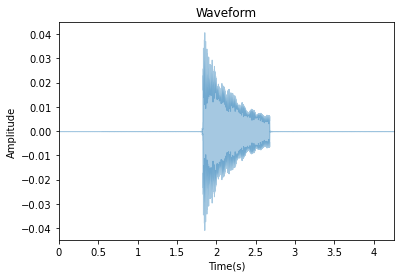

In [83]:
librosa.display.waveplot(data, sampling_rate, alpha=0.4)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title("Waveform")

더하여, NumPy의 fft를 이용해서 주파수 영역에서 plot할 수 있습니다. 

이제 본격적으로 STFT을 이용하여 spectrogram을 만들겠습니다.

In [84]:
fft_result = librosa.stft(data, n_fft=1024, hop_length=512, win_length = 1024, window=signal.hann).T
mag, phase = librosa.magphase(fft_result)

단위를 dB로 바꿔줍니다.

In [85]:
mag_db = librosa.amplitude_to_db(mag)

librosa.display는 plt와 함께 쓰입니다.

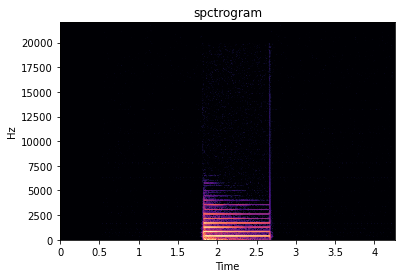

In [86]:
librosa.display.specshow(mag_db.T, y_axis='linear', x_axis='time', sr=sampling_rate)
plt.title('spctrogram')
plt.show()

##### 결론...
좋은 기능이 많고 사용하기 매우 편리합니다.

## 2. SoundFile(==PySoundFile)

In [87]:
import soundfile as sf

##### how to load data by PySoundFile: 
`data, rate = soundfile.read(file, frames=-1, start=0, stop=None, dtype='float64', always_2d=False, fill_value=None, out=None, samplerate=None, channels=None, format=None, subtype=None, endian=None, closefd=True)`


In [88]:
data, sampling_rate = sf.read(file_name2)

In [89]:
type(data)

numpy.ndarray

In [90]:
data

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

위처럼 librosa로 load한 결과와 shape이 다르기 때문에 사용할 수 있는 함수가 달라집니다.

In [91]:
sampling_rate

44100

한편...


PySoundFile은 read 보다는 write기능을 위해 자주 사용됩니다.
(librosa에서 default로 soundfile을 사용합니다.)

##### how to write data by PySoundFile : 
``sf.write(output_dir, data, sr, format='WAV', endian='LITTLE', subtype='PCM_16')``


더하여, `librosa.output.write_wav(output_dir+'.wav', data, sr)`라는 librosa를 사용하는 방법도 있지만 PySoundFile을 권장합니다. format을 설정할 때 librosa보다 더 많은 기능을 사용할 수 있습니다. PySoundFile 은 numpy 배열 오디오 버퍼에 직접 사용할 수있는 출력 기능을 제공합니다.

제대로 write되는지 확인하기 위해 임의로 white noise를 만들어 봅시다.

In [96]:
rate = 44100
data = np.random.uniform(-1, 1, size=(rate * 10, 2))

write by PySoundFile

In [97]:
# Write out audio as 24bit PCM WAV
sf.write(file_name, data, sampling_rate, subtype='PCM_24')

피아노 소리를 담고 있던 원본파일이 white noise로 변경되었습니다. 

In [98]:
# Write out audio as 24bit 
sf.write('stereo_file.flac', data, sampling_rate, format='flac', subtype='PCM_24')

In [99]:
# Write out audio as 16bit OGG
sf.write('stereo_file.ogg', data, sampling_rate, format='ogg', subtype='vorbis')

각각 설정한 확장자로 파일이 생성되었습니다.

##### 결론...
여러 확장자에서 작업하기 편리합니다.

## 3. PyAudio

오디오 파일의 재생, 마이크 같은 장치의 신호를 실시간으로 받아올 수 있다.

In [133]:
!pip install pipwin

  Created wheel for pipwin: filename=pipwin-0.5.1-py2.py3-none-any.whl size=8778 sha256=22f7794458c02f70d02d566ec76636129c9a1c4f1d3cfcb67bc27460daf3e3ba
  Stored in directory: c:\users\suyeo\appdata\local\pip\cache\wheels\94\1b\63\6465d24b53c03f566cfb25a7a9b806b4b0e29c95d82ac189d8
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=0d8afc52c079d38425a568260d1522080e8542f848b1b312e810adf4686d1bef
  Stored in directory: c:\users\suyeo\appdata\local\pip\cache\wheels\56\ea\58\ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
  Created wheel for pyjsparser: filename=pyjsparser-2.7.1-py3-none-any.whl size=25998 sha256=09ed57b8190785772dc24ef928c602cf9a37b7258689b2ca3e78901f851690cb
  Stored in directory: c:\users\suyeo\appdata\local\pip\cache\wheels\d5\88\34\ccb5bb40eb3178a134eb293e6c363928c5bcfba0b91031db76
Successfully built pipwin docopt pyjsparser


In [134]:
!pipwin install pyaudio

Building cache. Hang on . . .
Done
Package `pyaudio` found in cache
https://download.lfd.uci.edu/pythonlibs/r4tycu3t/PyAudio-0.2.11-cp38-cp38-win_amd64.whl
PyAudio-0.2.11-cp38-cp38-win_amd64.whl
[*] 0 bytes / 110 kB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 110 kB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 110 kB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 110 kB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 110 kB @ 0 bytes/s [------------------] [0.0%, 0s left]    [*] 0 bytes / 110 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   

In [54]:
import pyaudio
import wave

wave와 함께 사용된다.

### 1) record

In [55]:
# set parmeters. you don't need to set all of them.
CHUNK = 1024
FORMAT = pyaudio.paInt16
WIDTH = 2
CHANNELS = 2
RATE = 44100
RECORD_SECONDS = 5
recorded_file = "output.wav"

PyAudio를 사용하기 위해 instance합니다.

In [56]:
p = pyaudio.PyAudio() #instantiate PyAudio
p.get_default_input_device_info()#default input device check

{'index': 1,
 'structVersion': 2,
 'name': '스테레오 믹스(Realtek High Definition',
 'hostApi': 0,
 'maxInputChannels': 2,
 'maxOutputChannels': 0,
 'defaultLowInputLatency': 0.09,
 'defaultLowOutputLatency': 0.09,
 'defaultHighInputLatency': 0.18,
 'defaultHighOutputLatency': 0.18,
 'defaultSampleRate': 44100.0}

오디오 녹음 또는 재생을 위해서는 원하는 장치에서 open stream 합니다.

In [57]:
stream = p.open(format=p.get_format_from_width(WIDTH),channels=CHANNELS,
                rate=RATE,input=True,output=True,
                frames_per_buffer=CHUNK) #open stream

In [58]:
# read data
frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)): # 44100/1024*5
    data = stream.read(CHUNK)
    frames.append(data)     

작업이 끝나면 stream을 닫아줍니다.

In [59]:
# stop stream
stream.stop_stream()
stream.close()
#close PyAudio
p.terminate()

record file을 저장합니다.

In [60]:
wf = wave.open(recorded_file, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

경로를 저장합니다.

In [61]:
recorded_file_path = 'C:/Users/suyeo/Untitled Folder/output.wav'

### player

In [62]:
import wave
from array import array
from struct import pack

In [63]:
wf = wave.open('output.wav', 'rb')

PyAudio를 사용하기 위해 instance합니다.

In [64]:
p = pyaudio.PyAudio() #instantiate PyAudio
p.get_default_input_device_info()#default input device check

{'index': 1,
 'structVersion': 2,
 'name': '스테레오 믹스(Realtek High Definition',
 'hostApi': 0,
 'maxInputChannels': 2,
 'maxOutputChannels': 0,
 'defaultLowInputLatency': 0.09,
 'defaultLowOutputLatency': 0.09,
 'defaultHighInputLatency': 0.18,
 'defaultHighOutputLatency': 0.18,
 'defaultSampleRate': 44100.0}

오디오 녹음 또는 재생을 위해서는 원하는 장치에서 open stream 합니다.

In [65]:
stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),channels=wf.getnchannels(),
                rate=wf.getframerate(),output=True) # open stream

In [66]:
data = wf.readframes(CHUNK)

In [67]:
while len(data) > 0:
    stream.write(data)
    data = wf.readframes(CHUNK)

In [68]:
stream.stop_stream()
stream.close()

p.terminate()

##### 결론...
음성을 받아올 때 편리합니다.

### +TorchAudio
````
pitch 출력해보기
````

In [69]:
# !pip install torchaudio

In [70]:
import torch
import torchaudio
##import pysoundfile (가끔 torchaudio만으로 안될 때가 있음)

위에서 PySoundFile을 통해 파일을 변경했으므로 피아노 소리를 담은 또다른 pianoA4(origin)파일의 경로로 file_path를 설정해줍니다.

In [109]:
file_path = 'C:/Users/suyeo/Untitled Folder/pianoA4(origin).wav'

data를 load합니다.

##### how to write data by TorchAudio : 
`수정해야해요`

In [110]:
data, sampling_rate = torchaudio.load(file_path)

torchaudio를 이용하여 pitch를 계산할 수 있습니다.

In [111]:
pitch = torchaudio.functional.detect_pitch_frequency(data, sampling_rate)

이를 plot합니다.

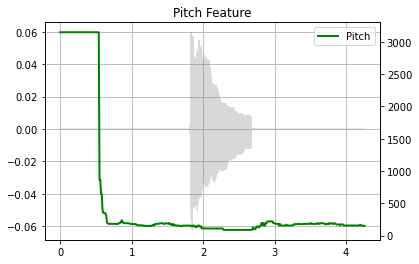

In [132]:
figure, axis = plt.subplots(1, 1)
axis.set_title("Pitch Feature")
axis.grid(True)

# set axis
end_time = data.shape[1] / sampling_rate
time_axis = torch.linspace(0, end_time, data.shape[1])

# in order to compare with amplitude
axis.plot(time_axis, data[0], linewidth=1, color='gray', alpha=0.3)
axis2 = axis.twinx()

# draw line by torch
time_axis = torch.linspace(0, end_time, pitch.shape[1])
ln2 = axis2.plot(
    time_axis, pitch[0], linewidth=2, label='Pitch', color='green')
axis2.legend(loc=0)

plt.show()

In [128]:
type(time_axis)

torch.Tensor

Tensor라는 datatype은 행렬과 비슷한 datatype이다.

##### 결론...
torch를 사용하면 더 편한 기능이 있습니다.

## 감사합니다!